# Decision Tree classifier

This algorithm predicts a label by learning from the provided data and representing it in a tree structure.

In [32]:
# importing necessary libraries 
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.pyplot as plt
import math

In [33]:
#loading the dataset 
df = sb.load_dataset('titanic') 
# viewing the first 5 of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# choosing the input and target variables 
X = df[['pclass','sex','age','sibsp','fare','class']] 
Y = df['survived']
# econding categorical variables 
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex']) 
genders = list(le.classes_) 
X['class'] = le.fit_transform(X['class']) 
classes = list(le.classes_) 
print('genders: ',genders) 
print('classes: ',classes)

genders:  ['female', 'male']
classes:  ['First', 'Second', 'Third']


C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_9276\3207225667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = le.fit_transform(X['sex'])
C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_9276\3207225667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['class'] = le.fit_transform(X['class'])


In [35]:
# check for missing values 
X.isna().sum()

pclass      0
sex         0
age       177
sibsp       0
fare        0
class       0
dtype: int64

In [36]:
# handling missing values in age column through mean
X['age']=X['age'].fillna(X['age'].median())

C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_9276\2249130379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age']=X['age'].fillna(X['age'].median())


In [37]:
# Applying test,train and split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42) 
# Training the model 
classifier = DecisionTreeClassifier() 
classifier.fit(X_train,Y_train) 
# calculating the accuracy 
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=y_pred) 
accuracy

0.7611940298507462

In [38]:
# predicting survived column through custom function 
def prediction(pclass,sex,age,sibsp,fare,choosen_class):
    sex_index = genders.index(sex) 
    class_index = classes.index(choosen_class) 

    survived = classifier.predict([[pclass,sex_index,age,sibsp,fare,class_index]]) 
    return 'yes' if survived == 1 else 'No'


survived = prediction(1,'male',45,0,95,'First')
survived

c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'yes'

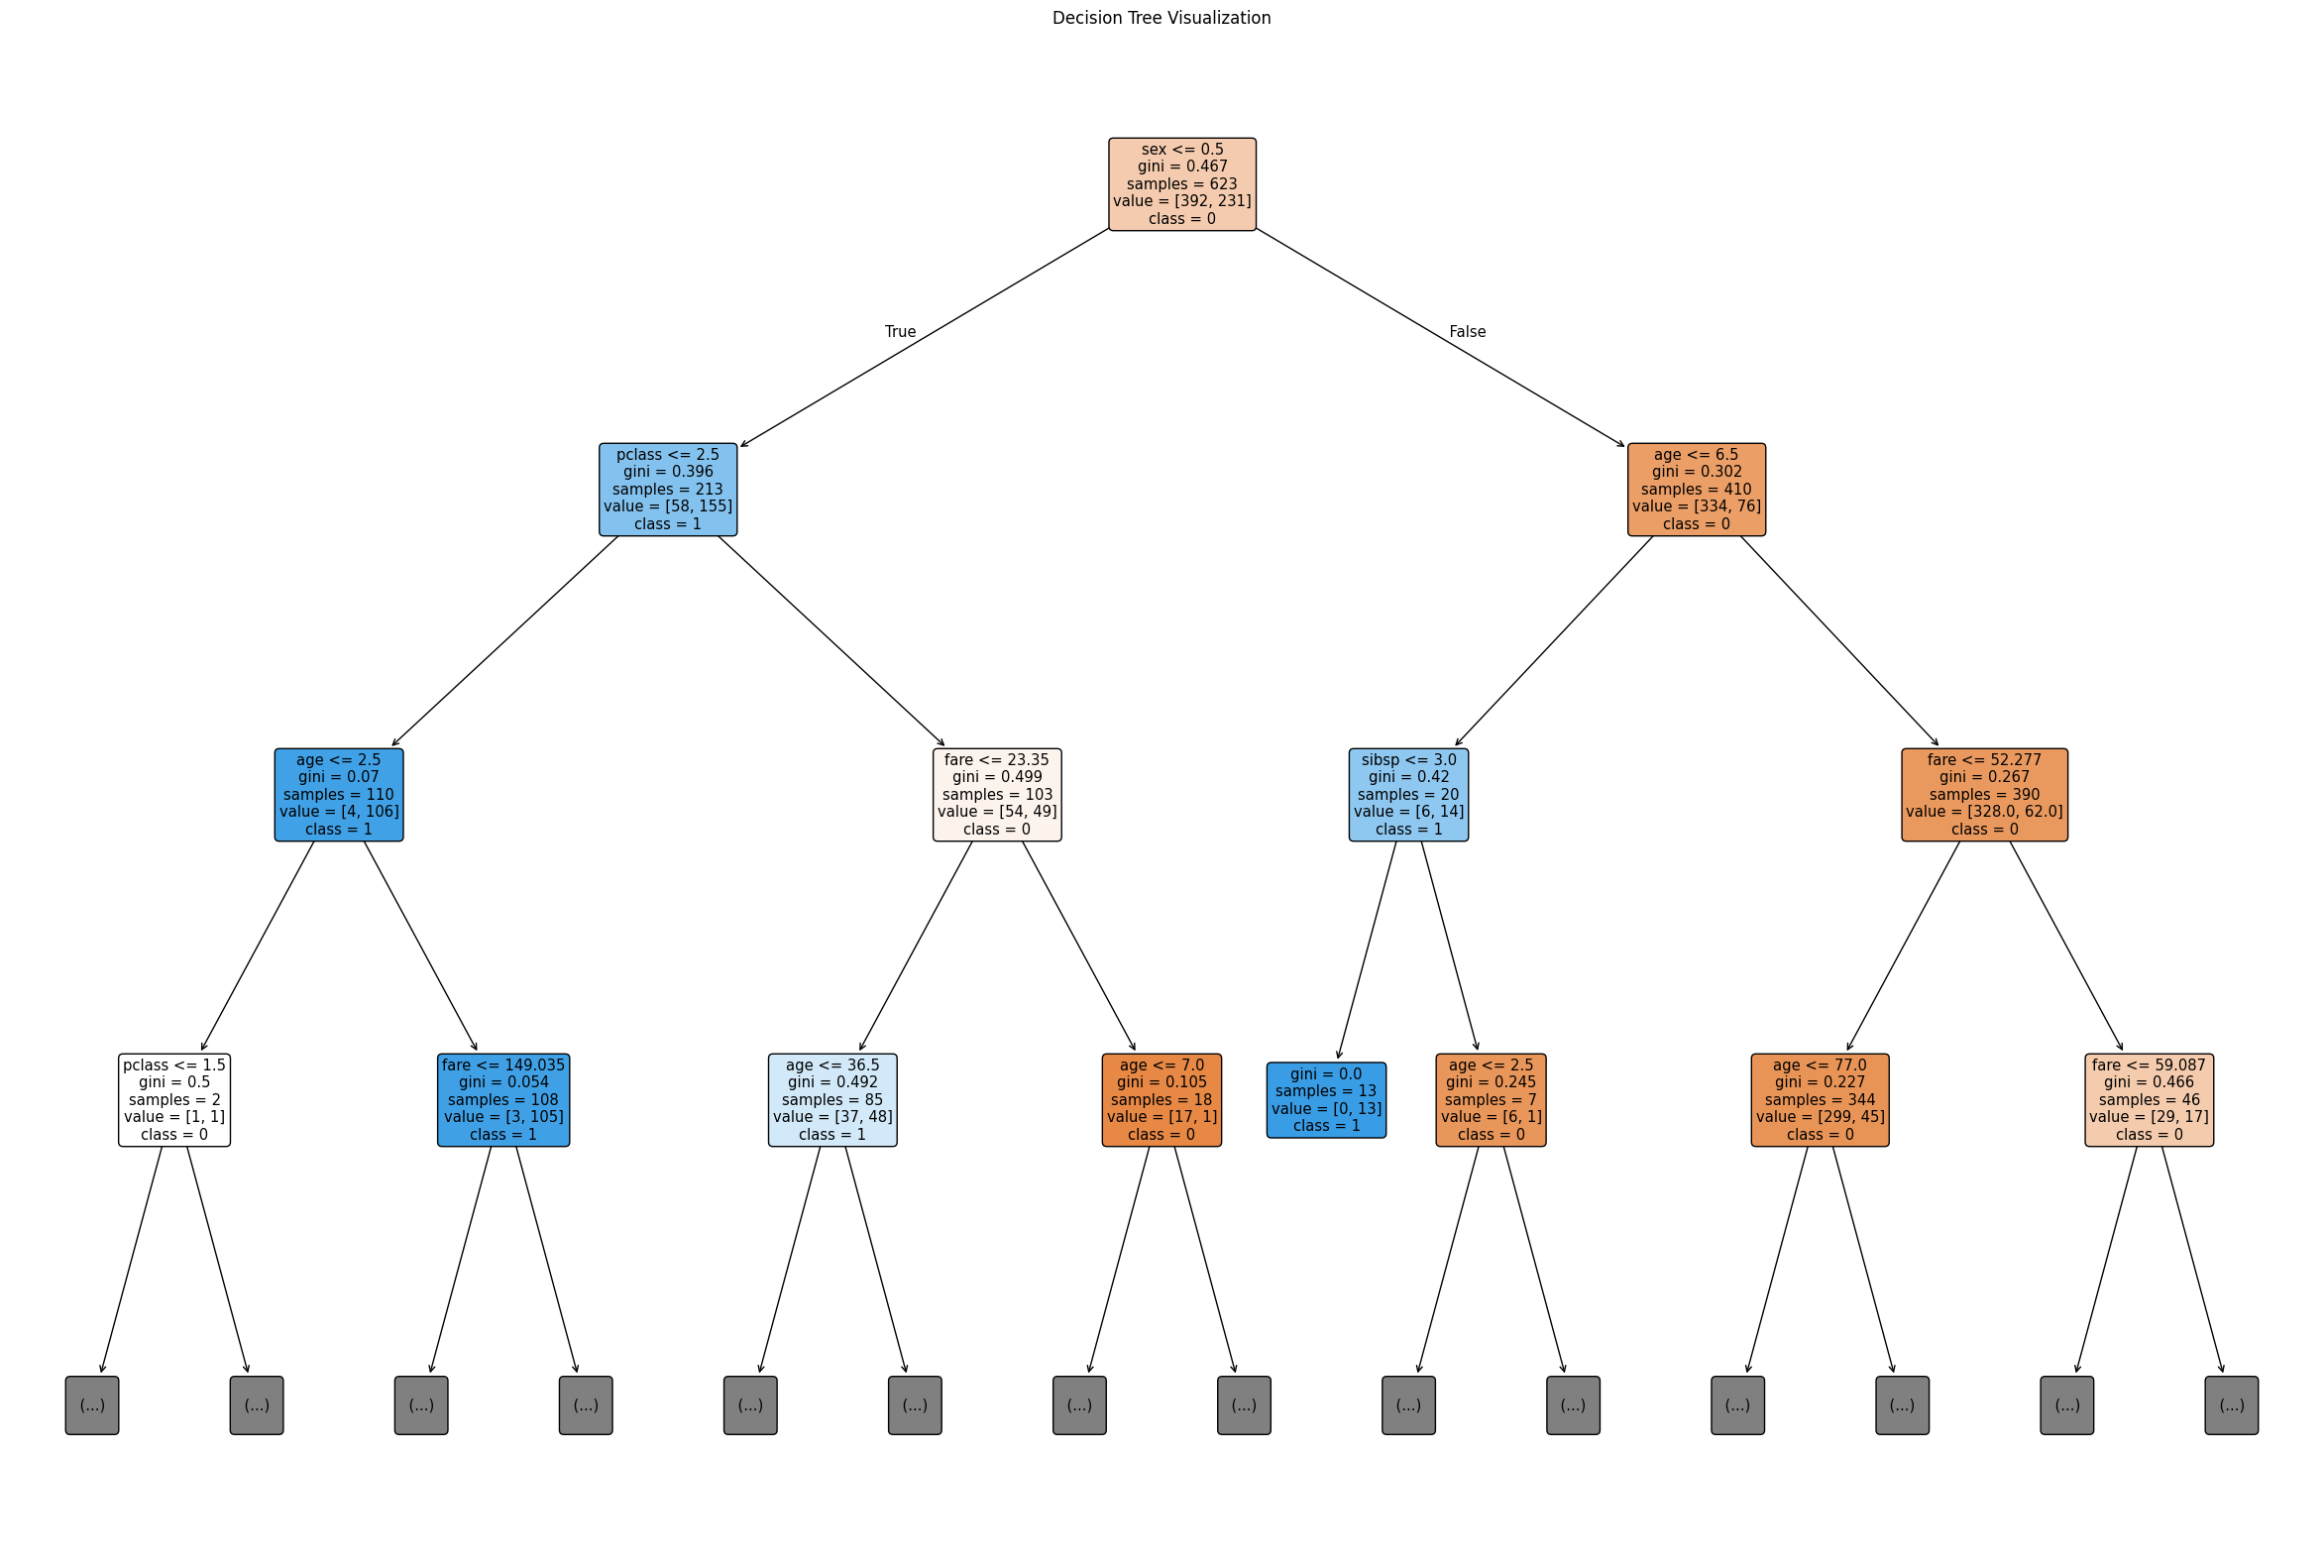

In [39]:
# visualizing the model
plt.figure(figsize=(30,20))
plot_tree(classifier, 
          filled=True, 
          rounded=True, 
          max_depth=3,
          class_names=classifier.classes_.astype(str), 
          feature_names=X.columns if hasattr(X, 'columns') else None)
plt.title("Decision Tree Visualization")
plt.show()

<b>Interpretations:</b> 

i.Sex is the most important feature: The very first split is based on it.<br>
ii.Age and Fare are used frequently.<br>
iii.Class and SibSp played secondary roles in determining the survival of a passenger.<br>
iv.Many young children and females survived, while males in lower classes or with lower fares were more likely not to.<br>

# Random Forest classifier

In [40]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier 
# redefining X - inputs 
X = df[['sex','age','sibsp','fare','alive']] # added alive column 
# redifining Y - output 
Y = df['class'] 
# handling missing value of age and vectorizing class 
X['age'] = X['age'].fillna(X['age'].median())
X['sex'] = le.fit_transform(X['sex']) 
genders = list(le.classes_)
print('Encoded genders: ',genders)
X['alive'] = le.fit_transform(X['alive']) 
alive_statuses = list(le.classes_) 
print("Encoded alive status: ",alive_statuses)
classifier = RandomForestClassifier() 
# Splitting the data into training and testing sample 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=42) 
# fitting the model 
classifier.fit(X_train,Y_train) 

Encoded genders:  ['female', 'male']
Encoded alive status:  ['no', 'yes']


C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_9276\2887432197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].median())
C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_9276\2887432197.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = le.fit_transform(X['sex'])
C:\Users\Sakriya Pyakurel\AppData\Local\Temp\ipykernel_9276\2887432197.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

RandomForestClassifier()

In [41]:
# calculating accuracy of the model 
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_true=Y_test,y_pred=y_pred) 
accuracy

0.9329608938547486

In [42]:
# redesigning the prediction function for Random forest classifier 
def prediction(sex,age,sibsp,fare,is_alive):
    sex_index = genders.index(sex) 
    alive_index = alive_statuses.index(is_alive)
    
    predicted_class = classifier.predict([[sex_index,age,sibsp,fare,alive_index]])[0]
    return predicted_class


predicted_class = prediction('male',45,0,95,'yes')
predicted_class

c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'First'

# Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor 
# using tips dataset 
df = sb.load_dataset('tips') 
# displaying the first five rows of the dataset 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
# checking for null values 
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [45]:
# Encoding categorical input features 
df['sex'] = le.fit_transform(df['sex']) 
genders = list(le.classes_)
print("genders: ",genders)
df['smoker'] = le.fit_transform(df['smoker']) 
smoker_status = list(le.classes_) 
print('smoker statuses: ',smoker_status) 
df['day'] = le.fit_transform(df['day']) 
days = list(le.classes_) 
print('days: ',days) 
df['time'] = le.fit_transform(df['time']) 
times = list(le.classes_)
print('times: ',times)  

genders:  ['Female', 'Male']
smoker statuses:  ['No', 'Yes']
days:  ['Fri', 'Sat', 'Sun', 'Thur']
times:  ['Dinner', 'Lunch']


In [46]:
# deciding input and target variables
X = df[['tip','sex','smoker','day','time','size']] 
Y = df['total_bill'] 
# splitting the dataset into training and testing samples 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=42)  
dt_regressor = DecisionTreeRegressor() 
# fitting the model 
dt_regressor.fit(X_train,Y_train) 

DecisionTreeRegressor()

In [47]:
# calculating the accuracy of the model
y_pred = dt_regressor.predict(X_test)
mse_accuracy = mean_squared_error(Y_test,y_pred)
mse_accuracy

52.56981275510204

In [48]:
# prediction 
predicted_bill = dt_regressor.predict([[5,1,0,2,0,3]]) 
predicted_bill

c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([31.27])

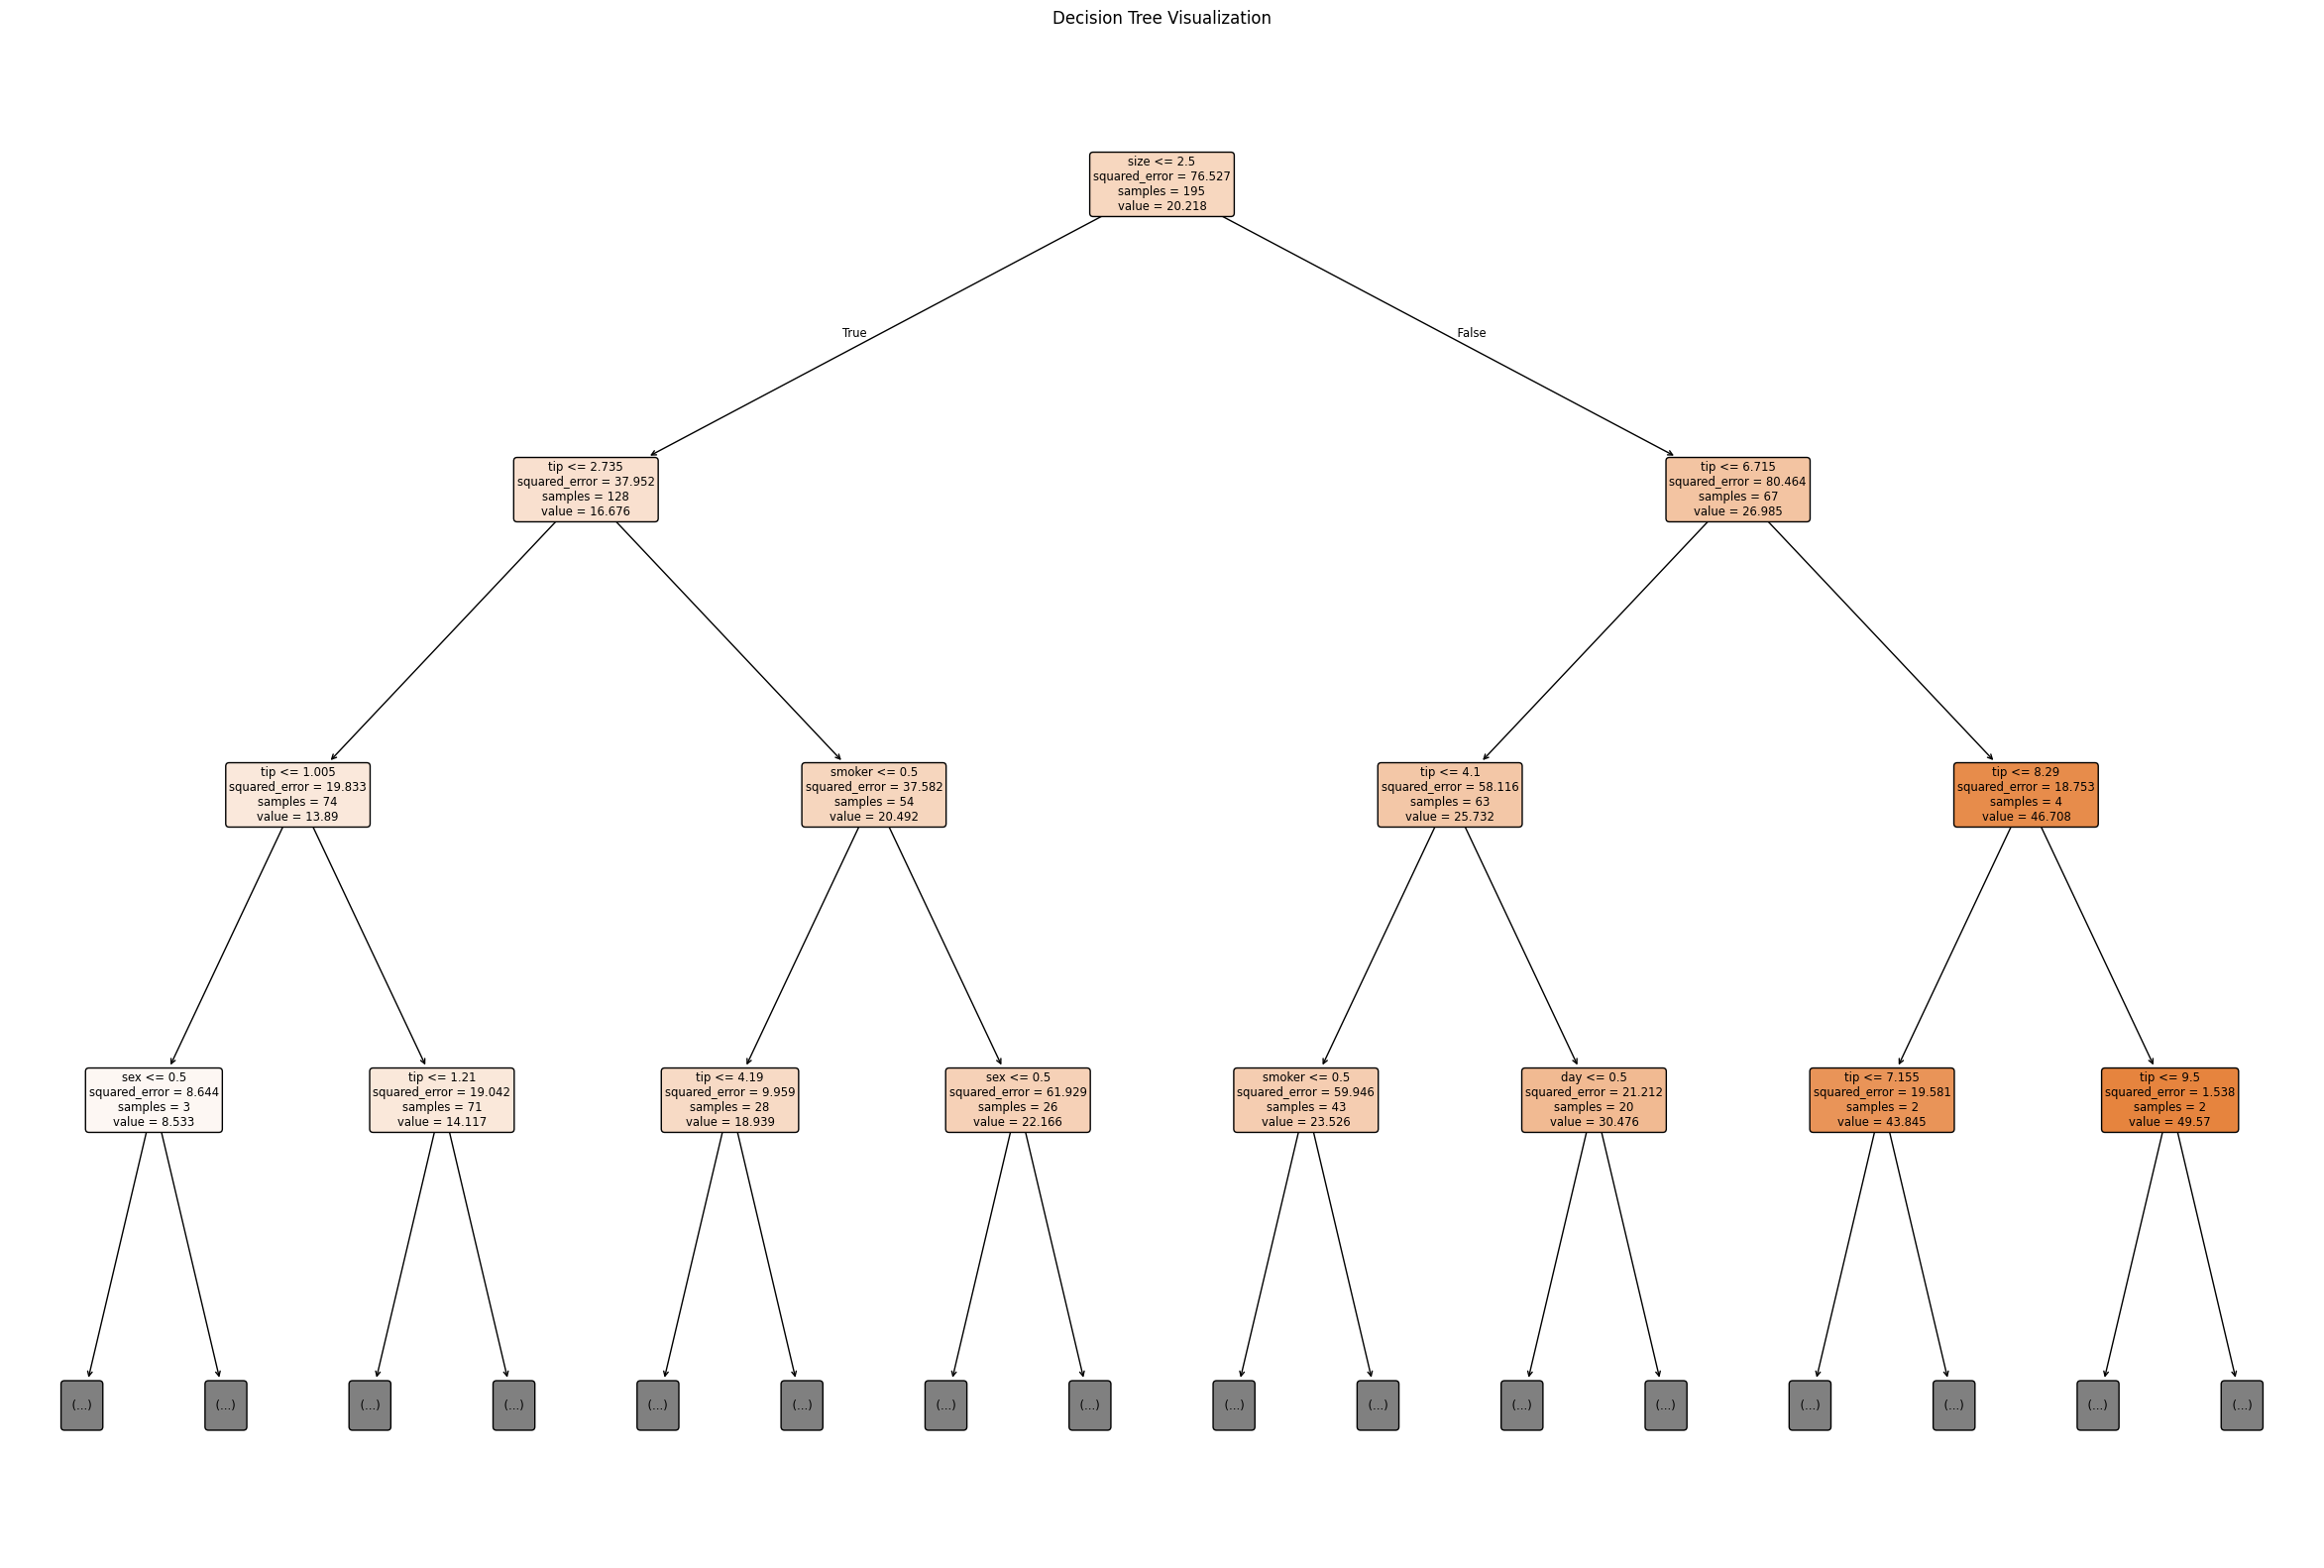

In [49]:
# visualizing the model
plt.figure(figsize=(30,20))
plot_tree(dt_regressor, 
          filled=True, 
          rounded=True, 
          max_depth=3,
          class_names=classifier.classes_.astype(str), 
          feature_names=X.columns if hasattr(X, 'columns') else None)
plt.title("Decision Tree Visualization")
plt.show()

<b>Interpretations:</b><br> 

i. Size is the most correlated feature with the total_bill feature based on which the first split is performed<br>
ii. Tip is the second most correlated feature with the total_bill feature based on which the second split is performed<br>
iii. Smoker has more correlation to the total_bill column feature indicating the restaurant charging a little high for smokers.<br>
iv. Sex and day column have least correlation to the total_bill column feature.

# Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor() # Random forest regressor model with 150 decision trees in total
# fitting the model
rf_regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
# accuracy calculation
y_pred = rf_regressor.predict(X_test)
mse_accuracy = mean_squared_error(Y_test,y_pred) 
mse_accuracy

41.310302755207374

In [52]:
# prediction 
predicted_bill = rf_regressor.predict([[5,1,0,2,0,3]]) 
predicted_bill

c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([28.6569])

# Exploring elements of Decision Tree Classifier

In [53]:
# Generating random dataset 
import pandas as pd 
import numpy as np 
data = pd.DataFrame(np.random.randint(0,100,size=(100,4)),columns = list('ABCD')) 
target = pd.Series(np.random.randint(0,2,size=(100)),name='target') 
data = pd.concat([data,target],axis=1) 
data.head()

,A,B,C,D,target
0,24,42,20,27,1
1,40,57,37,47,1
2,18,51,88,45,0
3,32,17,95,97,1
4,39,64,30,93,1


i. Entropy<br>

A method to calculate impurities(mixture of data having different characteristics) in the different levels and nodes of the decision tree.

In [54]:
def entropy(column):
    from math import log2 
    # calculating the probabilities of each unique value in the column '
    probabilities = column.value_counts(normalize=True) 
    # calculating entropy 
    entropy = sum(-p * log2(p) for p in probabilities) 
    return entropy
print('Entropy of target column: ',entropy(data['target'])) 

Entropy of target column:  0.9988455359952018


ii. Information gain<br>

Measures the reduction in entropy or impurity in the target variable brought about by partionining the data based on a certain attribute.<br>
Used in decision trees to decide the ordering of attribute of each node.

In [55]:
def calculate_information_gain(dataset, feature, target_column='target'):
    parent_labels = dataset[target_column]
    parent_impurity = entropy(parent_labels)

    weighted_child_impurity = 0
    unique_feature_values = dataset[feature].unique()

    for value in unique_feature_values:
        subset = dataset[dataset[feature] == value]
        child_labels = subset[target_column]
        weight = len(subset) / len(dataset)
        weighted_child_impurity += weight * entropy(child_labels)
    information_gain = parent_impurity - weighted_child_impurity
    return information_gain
print('Information gain for feature A: ',calculate_information_gain(data,'A'))

Information gain for feature A:  0.6237477859519325


iii. Gini impurity<br>

Measure used to determine how often a randomly choosen element from the set would be incorrectly labeled if it was radomly labeled according to the distribution if labels in the subset.

In [56]:
def gini_impurity(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(unique_labels)
    gini = 1 - np.sum(probabilities**2)
    return gini
print('Gini impurity of target column: ',gini_impurity(data['target']))

Gini impurity of target column:  -1251.0


- Concept of gini impurity, information gain and entropy in detail

In [57]:
# Example dataset 
n_A = 45
n_B = 55 
total = n_A + n_B

In [58]:
# calculating the proportion of each class 
p_A = n_A / total 
p_B = n_B / total 
# printing the proportions 
print('Proportion of class A: ',p_A) 
print('Proportion of class B: ',p_B)

Proportion of class A:  0.45
Proportion of class B:  0.55


In [59]:
# calculating entropy 
entropy = - (p_A * math.log2(p_A) + p_B * math.log2(p_B)) 
print('Entropy of the dataset: ',entropy) 

Entropy of the dataset:  0.9927744539878083


In [60]:
# calculating grin impurity 
gini_impurity = 1 - (p_A**2 + p_B**2) 
print('Gini Impurity of the dataset: ',gini_impurity)

Gini Impurity of the dataset:  0.4949999999999999


In [61]:
# calculating information gain with entropy and size for each dataset 
n_1_A,n_1_B = 3,2 
n_2_A,n_2_B = 3,2 

p_1_A = n_1_A / (n_1_A + n_1_B) 
p_1_B = n_1_B / (n_1_A + n_1_B) 
entropy_1 = - (p_1_A * math.log2(p_1_A) + p_1_B * math.log2(p_1_B)) 

p_2_A = n_2_A / (n_2_A + n_2_B) 
p_2_B = n_2_B / (n_2_A + n_2_B) 
entropy_2 = - (p_2_A * math.log2(p_2_A) + p_2_B * math.log2(p_2_B))

# Calculating information gain 
information_gain = entropy - (((n_1_A + n_1_B) / total) * entropy_1 + ((n_2_A + n_2_B) / total) * entropy_2) 
print('Information Gain: ',information_gain) 

Information Gain:  0.8956793945423414
